### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Na Li

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, seaborn, requests, beautifulsoup and comment from bs4, json, matplotlib
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/LALALA1010/inf510_project and execute this notebook
    
    In this project, I set two command-line parameters. One is "-source=local" for local mode, the other is"-source=remote" for remote mode. So if you input:
    
    - **python main.py -source=remote**
    
    You will invoke remote mode. In remote mode, the code will acquire raw data from websites and API, and store it into disk as CSV file firstly. Then, the model will processed these raw data, and visulize them. The whole output in this remote should include two csv files, and three figures. And if you input:
    
    - **python main.py -source=local**
    
    You will invoke local mode. In local mode, we don't need to acquire data from remote website or API, we can just load it locally. Then do the model step and visulization step same as above. The output should be three figures.
    
    If you input command-line parameters beyond above two, you may have to re-input to run the code correctly.
    

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    It may take a while to access the data remotely. It is wierd that sometimes if you access data remotely, it will crash. However, if you wait a few minutes, the code works. I think it is because sometimes the website is updating.
    

4.  **Anything else you feel is relevant to the grading of your project your project.**

    It is wierd that sometimes if you access data remotely, it will crash(It is rarely rarely happened). But if it happened, please wait a few minutes to rerun it, it will work!

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    In Milestone 1, I want to study something related with movies. But I changed my topic in Milestone 2 and 3. The final topic of my study is about NBA. I want to study the factors that may be related with nba player's salary, like player's height, player's rpm. Also, I studied the relationships between nba team's salary, win/lost ratio, and pts.
    
    I scrapped data from these three sources:
    
    1. http://www.espn.com/nba/salaries/_/year/2019
    2. https://www.basketball-reference.com/leagues/NBA_2019.html
    3. balldonite API(https://www.balldontlie.io/#introduction)

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    In this project, I want to know if player's height will affect their salary, and if a nba player who has higher rpm will higher salary. Also, I want to if a team has higher salary, then the team will get higher win/lost ration, and higher pts. From the RPM and Salary figure we could know, nba player's salary is not revelant to his height. In the high salary area, it contains all three level height players.  Generally, players who have higher RPM, would have higher salary. 
    For the team salary, if a team has higher win/lost ration, then the total salary they give to players would be higher. But it may not be revelant with PTS(Contrary to my assumption).

7. **What difficulties did you have in completing the project?**  

    One of difficulties I met was there were lots of options for me to plot the figure, but I have to figure out which one is suitable. Also, when I try to analyze my data, I found the data type is not correct, and I have to go back to data modeling step to re-model it. Like, I have to change the type of "height" from str into int. Another difficult I had was, when I scrap the team data from two sources, one is website, and the other is API. However, in these two websites, they represent team names in different ways. For example, in one website, it represents team "Los Angeles Clippers" by its whole name "Los Angeles Clippers"; but in the other website, they represent it as "LA Clippers". So I have to figure out a method to merge them. 
    

8. **What skills did you wish you had while you were doing the project?**

    I hope I could know more about how to scrap data from different websites. When I first did the project, I wanted to choose a topic related with house price. However, when I tried to scrap the data, I failed. Then I changed the topic. Now I know it was beacause I used an inappropriate method to scrap. If I tried another method, it would work. 
    Also, I want to know more about Pandas and Matplotlib, so I could processed my data more efficiently, and plot it more directly.  

9. **What would you do “next” to expand or augment the project?**

    In this project, I only scrap data in 2018 - 2019. In the next step, I will scrap data from more than one year to expand my project. For example, I may scrap data from 2015-2019, so the amount of sample will increase, and the result would be more precise. Also, in my current project, because of the limited sources, there exists some missing values. If scraped data from more than three sources, I could combine and merge related data, so the data would be more richful. Also, I would add and analyze more factors that may be relevant with player's salary, like position of players, age of players, and so on.

In [1]:
import sys
import pandas as pd
import warnings

import src.data_scraping as scrap
import src.data_storing as store
import src.data_modeling as model
import src.data_visulization as visual

In [2]:
print("Scraping data from web...")
all_data = scrap.scrap_all_data()
print("Storing data into disk...")
store.store_all_data(all_data)
print('Starting modeling data..')
processed_df = model.data_model()
print('Visualizing...')


Scraping data from web...
Storing data into disk...
Starting modeling data..
Visualizing...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# the function to cut height
def height_cut(df):
    if df.Height < 76:
        return 'not tall'
    elif df.Height > 80:
        return 'very tall'
    else:
        return 'tall'

In [6]:
player_data_df = processed_df[0]

# Take a look at column. 
# Below it is top 15 highest salary players. It is ranked by salary
player_data_df.head(15) 

,Rank,Name,Position,Team,Salary,Height,RPM,height_cut
0,1,Stephen Curry,G,Golden State Warriors,37.4572,75,6.84,not tall
1,2,Chris Paul,G,Houston Rockets,35.6542,72,4.76,not tall
2,3,LeBron James,F,Los Angeles Lakers,35.6542,80,5.44,tall
3,4,Russell Westbrook,G,Oklahoma City Thunder,35.6542,75,2.51,not tall
4,5,Blake Griffin,F,Detroit Pistons,32.0889,82,3.01,very tall
5,6,Gordon Hayward,F,Boston Celtics,31.2143,80,0.41,tall
6,7,Kyle Lowry,G,Toronto Raptors,31.2000,73,4.65,not tall
7,8,Paul George,F,Oklahoma City Thunder,30.5607,81,7.63,very tall
8,9,Mike Conley,G,Memphis Grizzlies,30.5211,73,3.27,not tall
9,10,James Harden,G,Houston Rockets,30.4219,77,7.42,tall


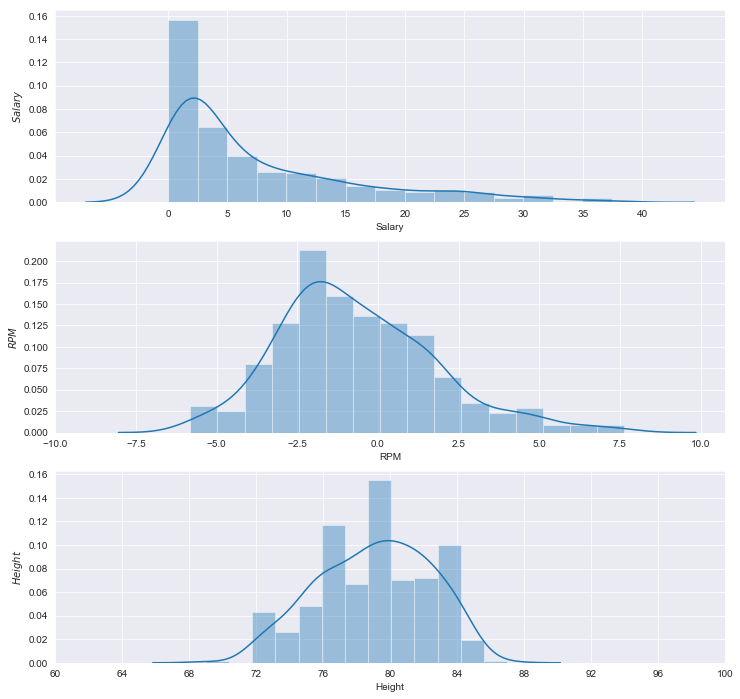

In [7]:
# plot salary distribution in nba players
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.subplot(3,1,1) 
sns.distplot(player_data_df['Salary'])
plt.xticks(np.linspace(0,40,9))
plt.ylabel(u'$Salary$',size=10)

# plot RPM distribution in nba players
plt.subplot(3,1,2)
sns.distplot(player_data_df['RPM'])
plt.xticks(np.linspace(-10,10,9))
plt.ylabel(u'$RPM$',size=10)

# plot Height distribution in nba players
plt.subplot(3,1,3)
sns.distplot(player_data_df['Height'])
plt.xticks(np.linspace(60,100,11))
plt.ylabel(u'$Height$',size=10)
plt.savefig('Distribution of NBA Players')

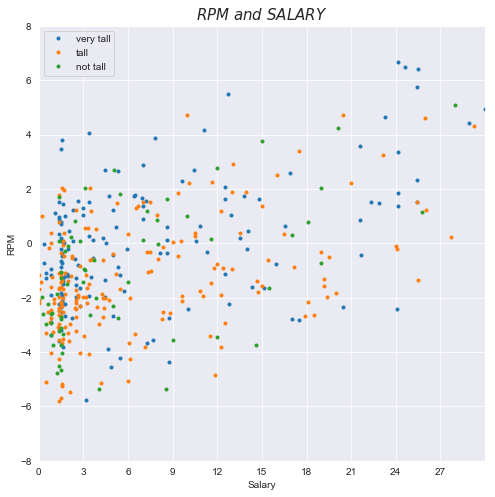

In [9]:
# cut the height of nba players into three level for further visulization
player_data_df['height_cut']=player_data_df.apply(lambda x: height_cut(x),axis=1) 

# plot the relationship between salary, rpm, and height
sns.set_style('darkgrid') 
plt.figure(figsize=(8,8))
plt.title(u'$RPM\ and\ SALARY$',size=15)

X1 = player_data_df.loc[player_data_df.height_cut=='very tall'].Salary
Y1 = player_data_df.loc[player_data_df.height_cut=='very tall'].RPM
X2 = player_data_df.loc[player_data_df.height_cut=='tall'].Salary
Y2 = player_data_df.loc[player_data_df.height_cut=='tall'].RPM
X3 = player_data_df.loc[player_data_df.height_cut=='not tall'].Salary
Y3 = player_data_df.loc[player_data_df.height_cut=='not tall'].RPM

plt.plot(X1,Y1,'.')
plt.plot(X2,Y2,'.')
plt.plot(X3,Y3,'.')
plt.xlim(0,30)
plt.ylim(-8,8)

plt.xlabel('Salary',size=10)
plt.ylabel('RPM',size=10)
plt.xticks(np.arange(0,30,3))

plt.legend(['very tall','tall','not tall'])
plt.savefig('Relationship Between Salary, RPM, and Height')

In [11]:
# Take a look at team data column. 
team_data_df = processed_df[1]
team_data_df

,Team_Name,Team_Salary,W_L_Ratio,PTS
0,Grizzlies,167050134,0.402,103.5
1,Wizards,160582684,0.390,114.0
2,76ers,153357133,0.622,115.2
3,Thunder,151109192,0.598,114.5
4,Warriors,144354753,0.695,117.7
5,Bucks,143470804,0.732,118.1
6,Blazers,130774013,0.646,114.7
7,Rockets,129028208,0.646,113.9
8,Celtics,125326739,0.598,112.4
9,Jazz,124680531,0.610,111.7


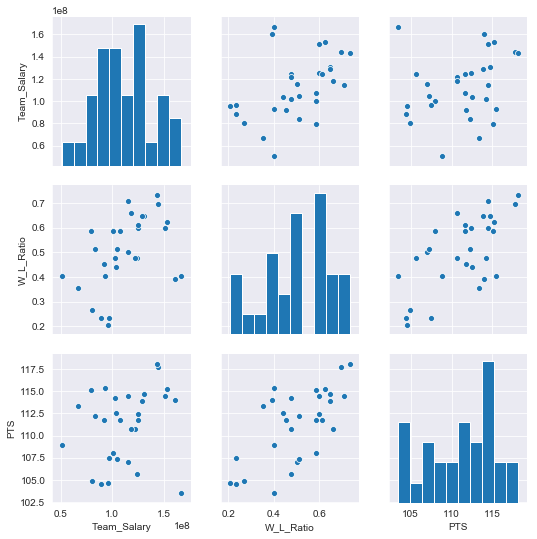

In [12]:

# plot the relationship between team win/lost ratio, PTS, and team salary
team_dat1 = team_data_df.loc[:,['Team_Salary','W_L_Ratio','PTS']]
sns.pairplot(team_dat1)
plt.savefig('Relationship Between Team Win_Lost Ratio, PTS, and Team Salary')
    